In [201]:
pip install dfply

     |████████████████████████████████| 612 kB 32.1 MB/s 


Cargar los librerias 

In [202]:
from sklearn import datasets
from dfply import *
import pandas as pd
import numpy as np
import seaborn as sns


In [102]:
base_mat = pd.read_csv('student-mat.csv', 
                 sep = ';'
                 )
base_mat.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


**¿DATOS FALNTANTES?**

In [103]:
NaN = base_mat.isnull().sum()
NaN

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### **Como se puede evidenciar no existen datos faltantes en ninguna de las variables del data set**

 ## **¿Cuántos estudiantes viven en zona urbana o rural? ¿Cuántos de los estudiantes rurales son mujeres y cuántas son hombres?**


### ¿Cuántos estudiantes viven en zona urbana o rural?

In [104]:
z_student = base_mat['address'].value_counts()
z_student

U    307
R     88
Name: address, dtype: int64

### ¿Cuántos de los estudiantes rurales son mujeres y cuántas son hombres?

In [105]:
Ru = base_mat[base_mat['address'] == 'R']

sex_R = Ru['sex'].value_counts()
sex_R

F    44
M    44
Name: sex, dtype: int64

##  **¿Cuántos estudiantes que viven en la zona rural se demoran en transportarse para llegar de la casa al colegio más de una hora?**

In [106]:
mas1 = Ru[Ru['traveltime'] == 4]
len(mas1)

5

### ¿Cuántos de ellos son mujeres y cuántos son hombres?

In [107]:
gen = mas1['sex'].value_counts()
gen

M    4
F    1
Name: sex, dtype: int64

## **¿Cuántos estudiantes que viven en la zona rural tienen más de 5 fallas?**

In [108]:
Fmas5 = Ru[Ru['absences']>5]
len(Fmas5)

38

### ¿Cuántos de ellos  son mujeres y cuántos son hombres?

In [109]:
Fa_Gen = Fmas5['sex'].value_counts()
Fa_Gen

F    20
M    18
Name: sex, dtype: int64

## **¿Cuántos estudiantes tienen madres y padres con un grado de escolaridad por encima de la educación secundaria?**



In [264]:
total = []
for i in range(1,len(base_mat)):
  if base_mat['Medu'][i] == 4 and  base_mat['Fedu'][i] == 4: 
    total = i
    print(total)

    



7
10
12
15
16
21
29
30
31
37
41
42
49
53
57
60
66
85
89
98
100
101
102
108
109
110
115
116
123
129
135
139
142
148
154
169
172
196
198
199
211
214
224
232
233
241
243
267
277
278
289
296
299
300
301
307
319
325
328
329
341
356
363
366
369
374
377
380
386


## **Se quiere ver la media de las notas de matemáticas de los estudiantes del colegio Gabriel Pereira vs Mousinho da Silveira, teniendo en cuenta si los estudiantes tienen o no internet en sus casas. Realice una visualización de datos teniendo en cuenta estas 3 variables.**

In [214]:
notas = base_mat['G1'],base_mat['G2'],base_mat['G3']
notas

(0       5
 1       5
 2       7
 3      15
 4       6
        ..
 390     9
 391    14
 392    10
 393    11
 394     8
 Name: G1, Length: 395, dtype: int64, 0       6
 1       5
 2       8
 3      14
 4      10
        ..
 390     9
 391    16
 392     8
 393    12
 394     9
 Name: G2, Length: 395, dtype: int64, 0       6
 1       6
 2      10
 3      15
 4      10
        ..
 390     9
 391    16
 392     7
 393    10
 394     9
 Name: G3, Length: 395, dtype: int64)

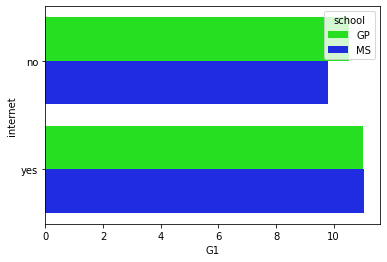

In [215]:
sns.barplot(data = base_mat,
            estimator = np.mean,
            x = "G1" ,
            y = "internet",
            hue = "school",
            ci = None,
            palette = 'hsv')

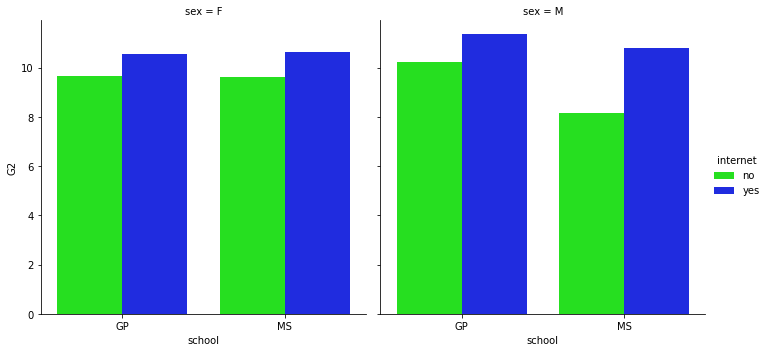

In [187]:
sns.catplot(data = base_mat,
            kind = "bar",
            estimator = np.mean,
            x = "school",
            y = "G2",
            hue = "internet",
            col = "sex",
            palette = 'hsv',
            ci = None)   

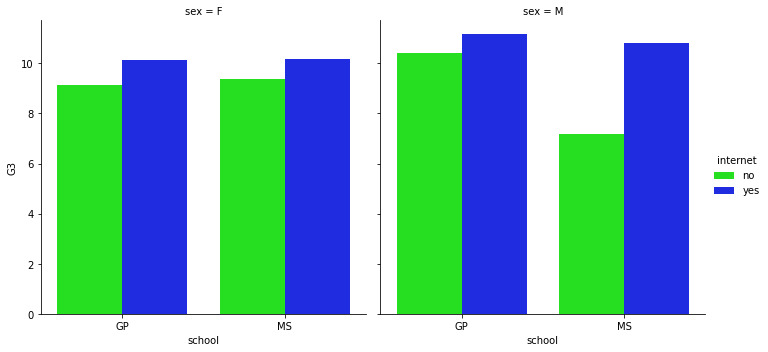

In [188]:
sns.catplot(data = base_mat,
            kind = "bar",
            estimator = np.mean,
            x = "school",
            y = "G3",
            hue = "internet",
            col = "sex",
            palette = 'hsv',
            ci = None)  

## **Cree una nueva variable en la tabla que corresponda a la calificación total para cada uno de los estudiantes y responda ¿Cuál es la media, mediana, mínima y máxima calificación total?**

In [224]:
basEdit = (base_mat >> 
              mutate(calTot = X.G1 + X.G2 + X.G3))
basEdit.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,calTot
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,32.037975
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,11.090357
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,25.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,32.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,40.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,58.000000


# *media*

In [219]:
mean(basEdit['calTot'])

32.037974683544306

# *mediana*

In [220]:
median(basEdit['calTot'])

32.0

# *minimo y maximo*

In [221]:
min(basEdit['calTot']),max(basEdit['calTot'])

(4, 58)

## Teniendo en cuenta que el dataset contiene tanto variables numéricas como variablescategóricas responda ¿Qué tipo de análisis realizaría: Regresión o clasificación? Si fueraregresión o clasificación: ¿Qué variable usaría para predecir o clasificar? ¿Cuáles variables tiene la hipótesis que podrían servir para pronosticar o clasificar?

*Con el data set studen_ mat realizaria una regresion con la variable tiempo de estudio (studytime) y de acuerdo a las variables como lo son traveltime, age, sex, activities,higher,internet,romantic,freetime,absences,failures pronosticar el tiempo de estudio empleado de acuerdo a las actividades o frecuencias observadas.*